In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [36]:
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [38]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [43]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some visual settings for better plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Step 2: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset/Housing.csv")

# Step 3: Preview the dataset
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [44]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Column names and data types
print("\nColumn info:")
df.info()

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics
print("\nDescriptive statistics:")
df.describe()


Dataset shape: (545, 13)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories   

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


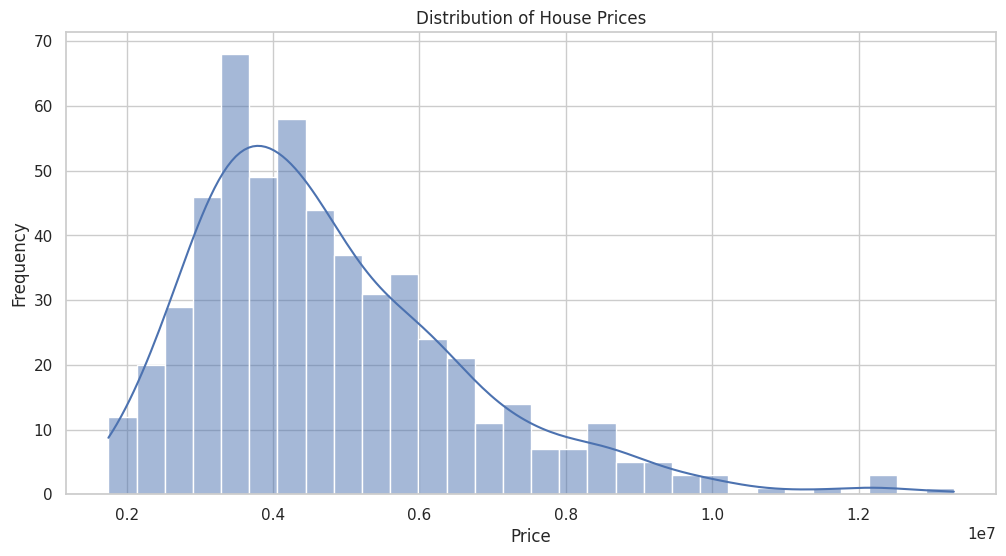

In [45]:
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


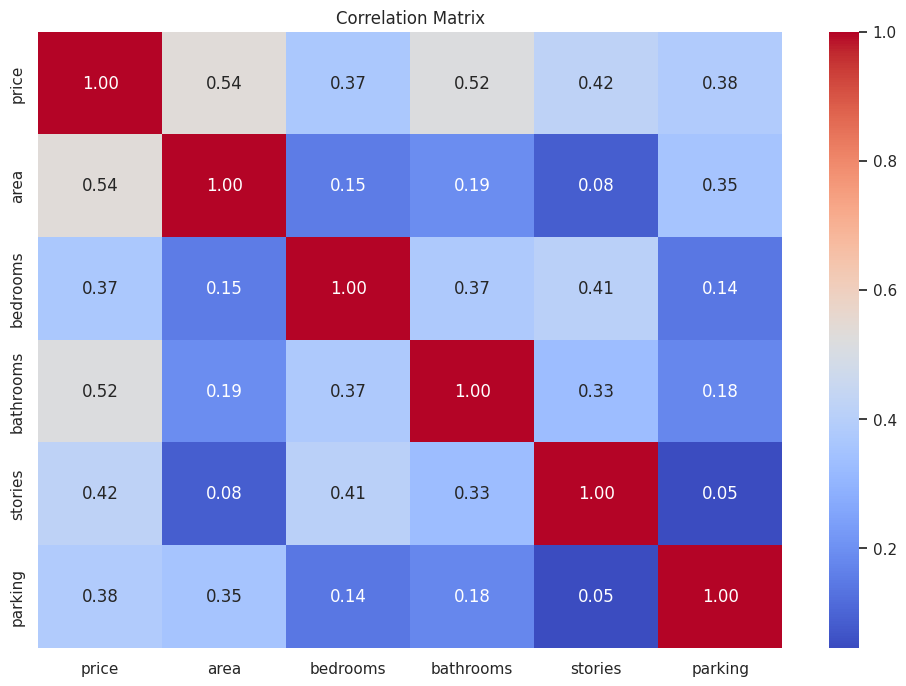

In [46]:
# Only for numeric columns
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


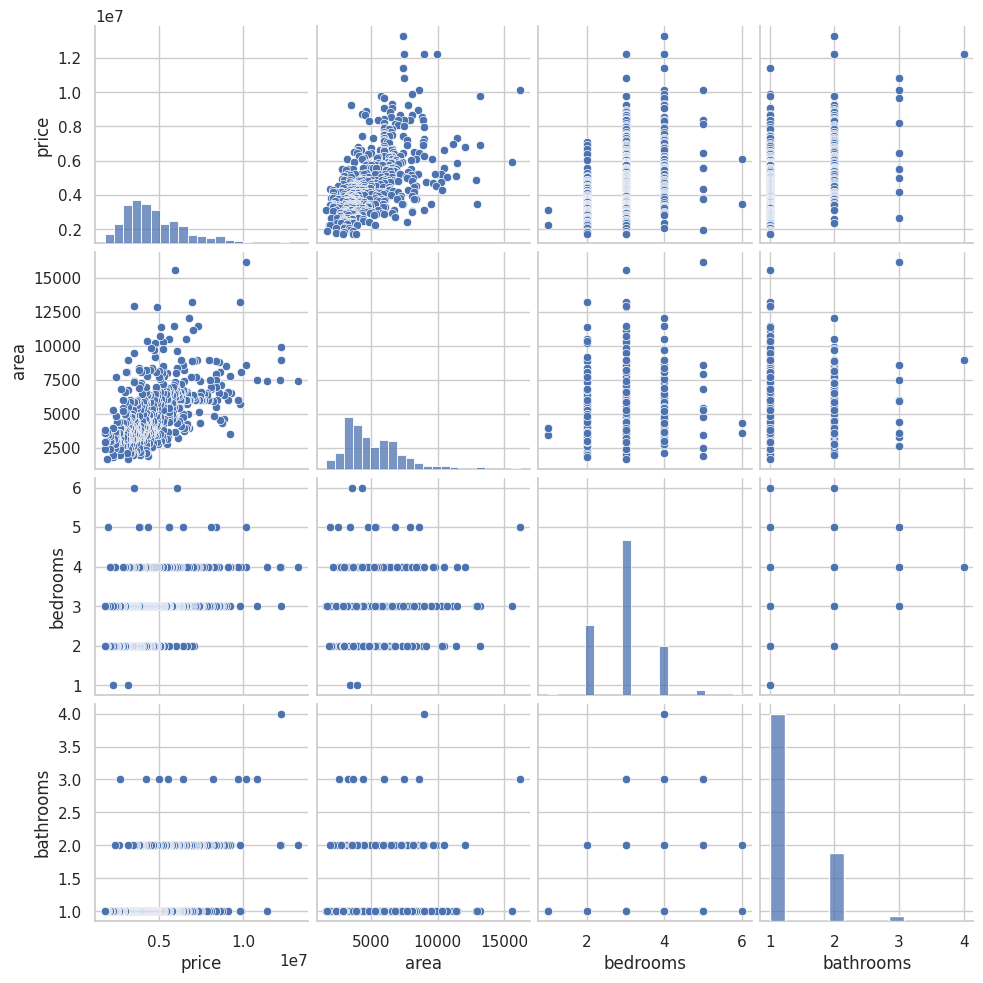

In [47]:
# You can limit to few important features if too many columns
sample_cols = ['price', 'area', 'bedrooms', 'bathrooms']
sns.pairplot(df[sample_cols])
plt.show()


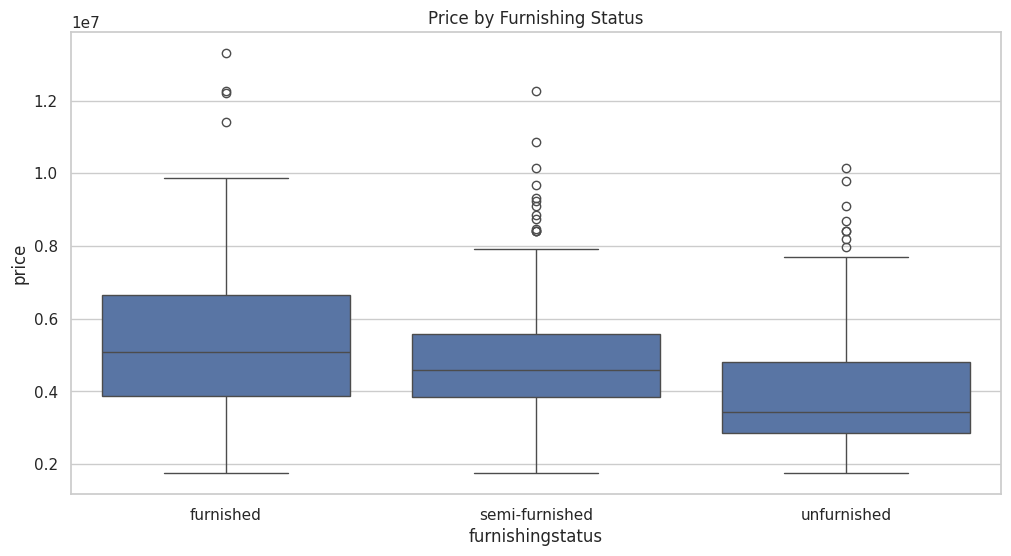

In [48]:
# Replace 'furnishingstatus' with any categorical column present in your dataset
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title('Price by Furnishing Status')
plt.show()


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For better visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [54]:
# 📌 Step 5: Encode Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [55]:
# 📌 Step 6: Split Data
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"🔹 Training samples: {X_train.shape[0]}")
print(f"🔹 Testing samples: {X_test.shape[0]}")

🔹 Training samples: 436
🔹 Testing samples: 109


In [56]:
# 📌 Step 7: Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
# 📌 Step 8: Predictions and Evaluation
y_pred = model.predict(X_test)

print("\n📋 Model Evaluation:")
print(f"✅ R-squared Score: {r2_score(y_test, y_pred):.3f}")
# Calculate RMSE by taking the square root of the Mean Squared Error
print(f"✅ RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


📋 Model Evaluation:
✅ R-squared Score: 0.653
✅ RMSE: 1324506.96


In [59]:
# 📌 Step 9: Compare Actual vs Predicted
comparison_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
}).reset_index(drop=True)

print("\n🧾 Sample Predictions:")
print(comparison_df.head(10))


🧾 Sample Predictions:
   Actual Price  Predicted Price
0       4060000     5.164654e+06
1       6650000     7.224722e+06
2       3710000     3.109863e+06
3       6440000     4.612075e+06
4       2800000     3.294646e+06
5       4900000     3.532275e+06
6       5250000     5.611775e+06
7       4543000     6.368146e+06
8       2450000     2.722857e+06
9       3353000     2.629406e+06


Model: Linear Regression
Cross-validation Mean MSE: 1050105539012.7383
Test MSE: 1754318687330.7036
Test R-squared: 0.6529242642153106


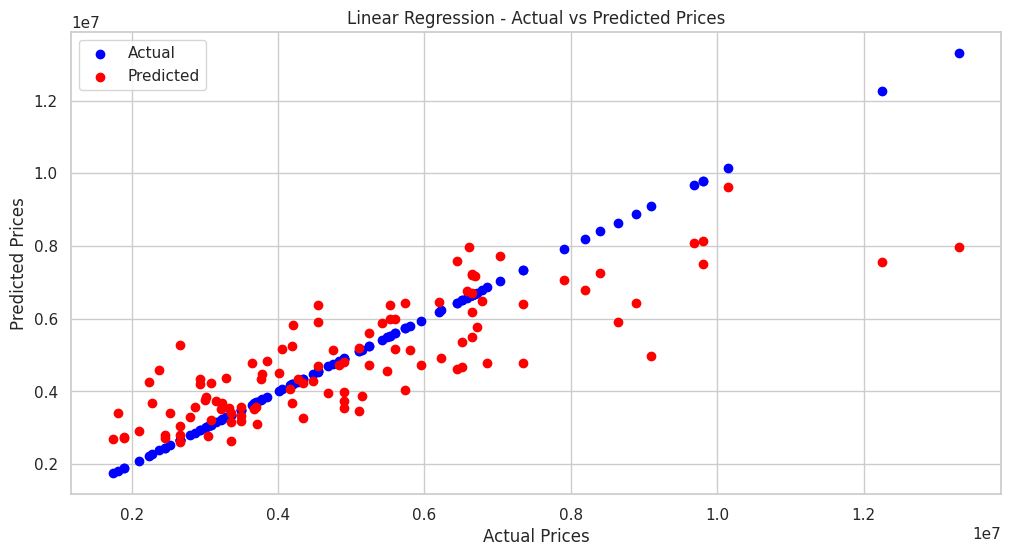

Model: Random Forest
Cross-validation Mean MSE: 1177815614507.6426
Test MSE: 1877334508502.235
Test R-squared: 0.6285867211254452


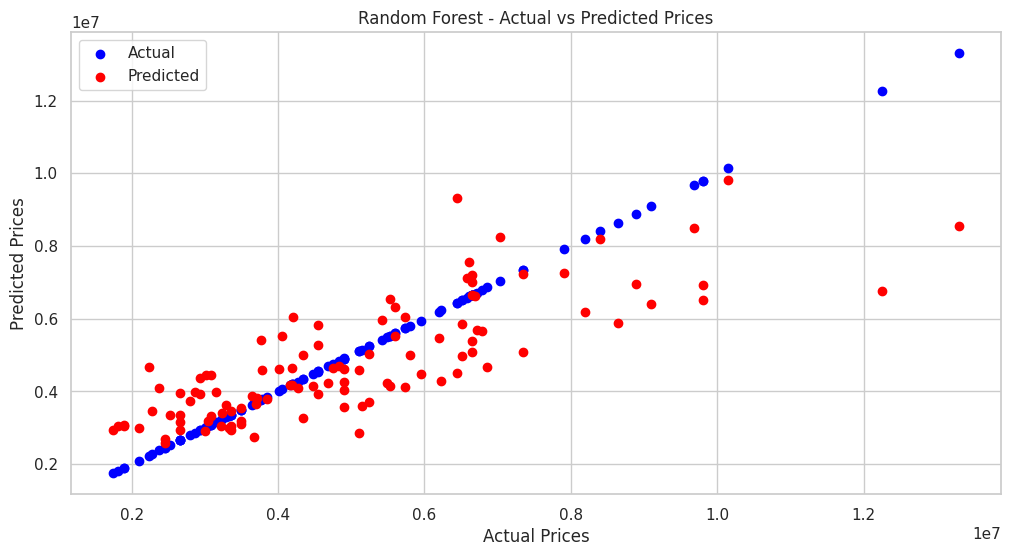

In [62]:
# Define features based on your dataset
# Assuming these are the categorical and numerical features in your original df
# Make sure these column names actually exist in your 'df'
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] # Add other numerical features if present

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# numerical_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler()) # Uncomment and import StandardScaler if scaling is needed
# ])

# Create a column transformer to apply different transformations to different columns
# This preprocessor will be used within the pipeline for cross-validation and testing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        # ('num', numerical_transformer, numerical_features) # Uncomment if you added numerical_transformer
    ],
    remainder='passthrough' # Keep the rest of the columns that were not explicitly listed
)


# Define models
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor())
]

# Model Building and Evaluation
for name, model in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor), # Use the defined preprocessor here
        ('model', model)
    ])

    # Prepare data
    # Use the original df here, as the preprocessor will handle the encoding
    X = df.drop('price', axis=1)
    y = df['price']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    # The pipeline handles the preprocessing within cross_val_score
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    cv_results = -cv_results  # Convert negatives to positives for MSE

    # Print results
    print(f"Model: {name}")
    print(f"Cross-validation Mean MSE: {cv_results.mean()}")

    # Fit model on full training set
    # The pipeline handles the preprocessing during fitting
    pipeline.fit(X_train, y_train)

    # Predictions on test set
    # The pipeline handles the preprocessing before prediction
    y_pred = pipeline.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print test set results
    print(f"Test MSE: {mse}")
    print(f"Test R-squared: {r2}")

    # Plot predictions vs actual values
    plt.scatter(y_test, y_test, color='blue', label='Actual')
    plt.scatter(y_test, y_pred, color='red', label='Predicted')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')

    plt.title(f"{name} - Actual vs Predicted Prices")
    plt.legend()
    plt.show()